<a href="https://colab.research.google.com/github/009-OneEyedEagle/Data_Analysis_Project/blob/main/Titanic%20Survival%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

**Reading The data set**

In [ ]:
titanic_data=pd.read_csv('/content/Titanic Data/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Checking Corelation**





<ipython-input-4-2f5e9ca8ea84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(),cmap="YlGnBu",annot=True)


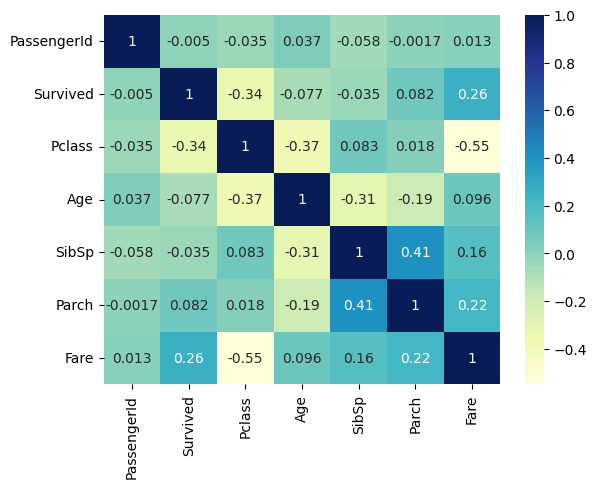

In [ ]:
sns.heatmap(titanic_data.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Data Visualization**

<Axes: xlabel='Survived', ylabel='count'>

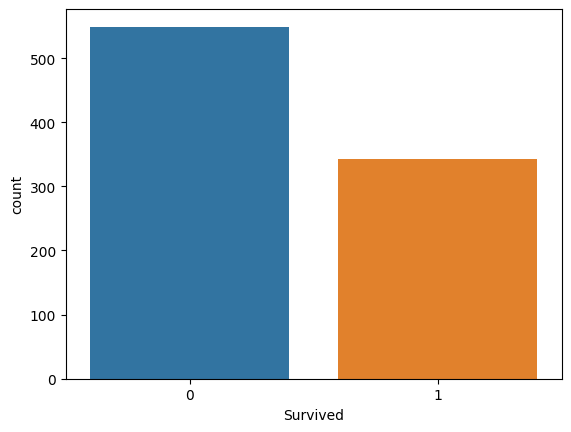

In [ ]:
sns.countplot(x="Survived",data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

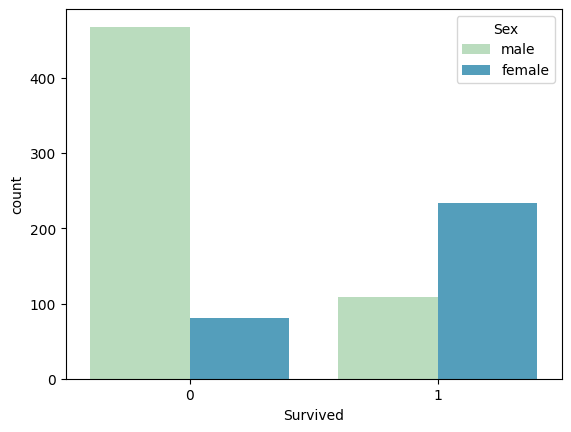

In [ ]:
sns.countplot(x="Survived",hue="Sex",data=titanic_data,palette='GnBu')

<Axes: xlabel='Survived', ylabel='count'>

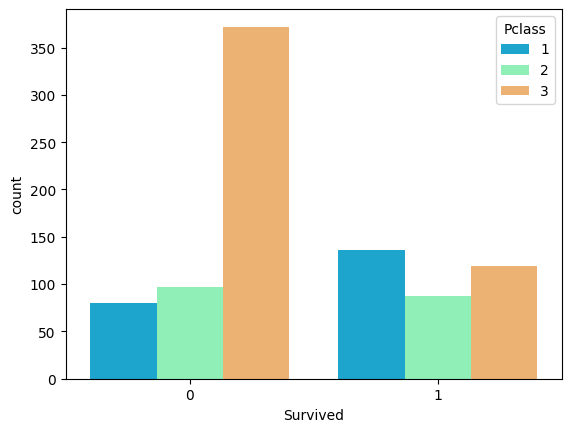

In [ ]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

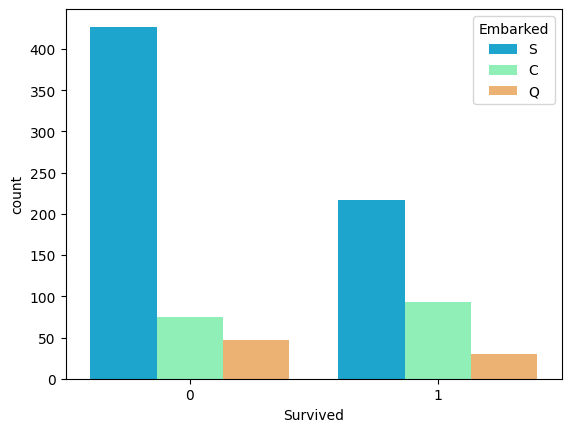

In [ ]:
sns.countplot(x="Survived",hue="Embarked",data=titanic_data,palette='rainbow')

Spliting the data set into training and testing data set

In [ ]:
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
  strat_train_set=titanic_data.loc[train_indices]
  strat_test_set=titanic_data.loc[test_indices]

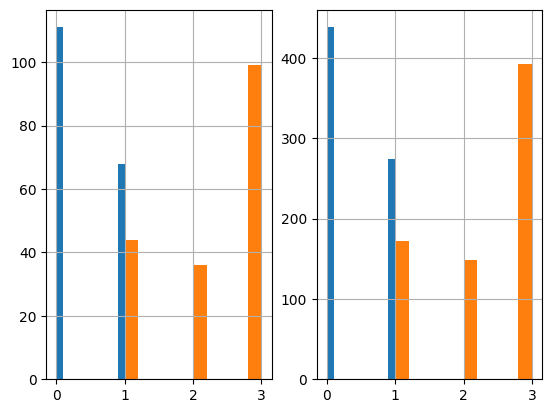

In [ ]:
plt.subplot(1,2,1)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.show()

**Data Cleaning**

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 495 to 572
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          562 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


**Replacing Missing Age values with Mean age value**

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
  def fit(self,X,Y=None):
    return self
  def transform(self, X):
    imputer=SimpleImputer(strategy='mean')
    X['Age']=imputer.fit_transform(X[["Age"]])
    return X

**Encoding the Sex and Embarked Columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator,TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    encoder=OneHotEncoder()
    matrix=encoder.fit_transform(X[['Embarked']]).toarray()
    column_names=["C","S","Q","N"]
    for i in range(len(matrix.T)):
      X[column_names[i]]=matrix.T[i]
    matrix=encoder.fit_transform(X[['Sex']]).toarray()
    column_names=["Females","Males"]
    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]
    return X

**Removing features not required for prediction**

In [ ]:
class FeatureDropper(BaseEstimator,TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [ ]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([("ageimputer",AgeImputer()),
                   ("featureencoder",FeatureEncoder()),
                   ("featuredropper",FeatureDropper())])

**Training data before cleaning**

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S


**Training data after cleaning through the pipeline**

In [ ]:
strat_train_set=pipeline.fit_transform(strat_train_set)

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Females,Males
495,496,0,3,29.750302,0,0,14.4583,1.0,0.0,0.0,0.0,1.0
464,465,0,3,29.750302,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
388,389,0,3,29.750302,0,0,7.7292,0.0,1.0,0.0,0.0,1.0
313,314,0,3,28.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
391,392,1,3,21.000000,0,0,7.7958,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
837,838,0,3,29.750302,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
169,170,0,3,28.000000,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
538,539,0,3,29.750302,0,0,14.5000,0.0,0.0,1.0,0.0,1.0
183,184,1,2,1.000000,2,1,39.0000,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

X=strat_train_set.drop(['Survived'],axis=1)
y=strat_train_set['Survived']

scaler=StandardScaler()
X_Data=scaler.fit_transform(X)
y_Data=y.to_numpy()

**Model Training on training Data Set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()
param_grid=[
    {"n_estimators":[10,100,200,500], "max_depth": [None,5,10], "min_samples_split": [2,3,4]}
]

grid_search=GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_Data,y_Data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf=grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=500)

 **Model Testing on testing Data Set**

In [ ]:
strat_test_set=pipeline.fit_transform(strat_test_set)

In [ ]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test=strat_test_set['Survived']

scaler=StandardScaler()
X_Data_test=scaler.fit_transform(X_test)
y_Data_test=y_test.to_numpy()

In [ ]:
a=final_clf.score(X_Data_test,y_Data_test)
print("Accuracy of Model = ",a*100,"%")

Accuracy of Model =  81.00558659217877 %


Training on the whole data set

In [ ]:
final_data=pipeline.fit_transform(titanic_data)

In [ ]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Females,Males
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_final=strat_test_set.drop(['Survived'],axis=1)
y_final=strat_test_set['Survived']

scaler=StandardScaler()
X_Data_final=scaler.fit_transform(X_final)
y_Data_final=y_final.to_numpy()

In [ ]:
prod_clf=RandomForestClassifier()
param_grid=[
    {"n_estimators":[10,100,200,500], "max_depth": [None,5,10], "min_samples_split": [2,3,4]}
]

grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_Data_final,y_Data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
Final_prod_clf=grid_search.best_estimator_

**Testing the model on an unknown data**

In [ ]:
testing_data=pd.read_csv('/content/Titanic Data/model test.csv')
testing_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [ ]:
Final_testing_data=pipeline.fit_transform(testing_data)

In [ ]:
Final_testing_data.insert(7,"S",0.0)
Final_testing_data.insert(8,"Q",0.0)
Final_testing_data.insert(9,"Male",0.0)
Final_testing_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Females
0,892,3,34.5,0,0,7.8292,1.0,0.0,0.0,0.0,1.0


In [ ]:
scaler=StandardScaler()
X_test_test=scaler.fit_transform(Final_testing_data)


In [ ]:
prediction=Final_prod_clf.predict(X_test_test)

In [ ]:
print(prediction)

[0]
